Titanic_project

Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
df_train=pd.read_csv(r"C:\Users\Aj\Downloads\Data sets decodr\train.csv")

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Taking off NULL VALUES

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_train.shape

(891, 12)

In [10]:
df_train = df_train.drop(["Name","Ticket","Cabin","PassengerId"],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
def age_approx(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass ==2:
            return 29
        else:
            return 24
    else:
        return age

In [14]:
df_train.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [15]:
df_train["Age"] = df_train[["Age","Pclass"]].apply(age_approx,axis=1)

In [16]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [17]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
df_train_dummied =pd.get_dummies(df_train,columns=["Sex"])

In [19]:
df_train_dummied =pd.get_dummies(df_train_dummied,columns=["Embarked"])

In [20]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

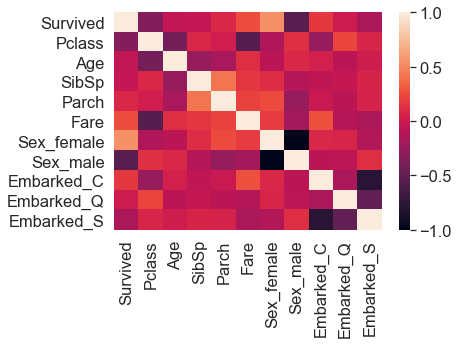

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

There is a strong correleation among survived and sex_female

Now let's us bulid a classifier which can predict survival creating train and test data sets using accent y variables

In [23]:
used_features =["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

x = df_train_dummied[used_features].values
y = df_train_dummied["Survived"]

In [24]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


# Creating the Model

In [26]:
LogReg =LogisticRegression()

In [28]:
LogReg.fit(x_train,y_train)

C:\Users\Aj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Storing the prediction given by the classifier in the y_pred variable

In [29]:
y_pred =LogReg.predict(x_test)

In [30]:
metrics.confusion_matrix(y_test,y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [31]:
metrics.accuracy_score(y_test,y_pred)

0.8314606741573034

In [32]:
len(x_test)

267

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [34]:
LogReg.coef_

array([[-1.04235714, -0.03987072, -0.2430114 , -0.04010424,  1.19490362,
        -1.19371741,  0.34975113, -0.03595876, -0.31260616]])

In [35]:
LogReg.intercept_

array([3.65600731])

In [36]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [37]:
LogReg.predict_proba(x_test)

array([[0.2653695 , 0.7346305 ],
       [0.3965287 , 0.6034713 ],
       [0.94740883, 0.05259117],
       [0.25923486, 0.74076514],
       [0.94431996, 0.05568004],
       [0.13499928, 0.86500072],
       [0.33324153, 0.66675847],
       [0.51988917, 0.48011083],
       [0.7817593 , 0.2182407 ],
       [0.40743129, 0.59256871],
       [0.73994688, 0.26005312],
       [0.21151568, 0.78848432],
       [0.74862296, 0.25137704],
       [0.14579365, 0.85420635],
       [0.86465969, 0.13534031],
       [0.36956639, 0.63043361],
       [0.89370413, 0.10629587],
       [0.29759816, 0.70240184],
       [0.17620376, 0.82379624],
       [0.39884205, 0.60115795],
       [0.90493058, 0.09506942],
       [0.55285042, 0.44714958],
       [0.86443353, 0.13556647],
       [0.93768612, 0.06231388],
       [0.51608679, 0.48391321],
       [0.5159904 , 0.4840096 ],
       [0.03911279, 0.96088721],
       [0.86925803, 0.13074197],
       [0.89819212, 0.10180788],
       [0.32497897, 0.67502103],
       [0.